In [5]:
import os
from astropy.table import Table, Column  ## to use astropy tables as our data storage and interaction format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter, NullFormatter
import matplotlib.gridspec as gridspec
font_prop = font_manager.FontProperties(size=20)

%matplotlib inline

In [31]:
# obj_name = "Cyg_X-2"
homedir = os.path.expanduser("~")
exe_dir = os.getcwd()
# data_dir = "%s/Reduced_data/%s" % (homedir, obj_name)
# data_file = "%s/glcbin1.5h_lcbg_v1.csv" % data_dir
data_dir = "%s/Reduced_data" % (homedir)

data_file = "%s/1348-glcbin6.0h_regbg_v1.csv" % data_dir
obj_name = "MAXI_J1348-630"


tab = Table.read(data_file, format='csv', names=('mjd', 'mjd_min', 'mjd_max', 
                                                 'broad', 'err broad',
                                                 'soft', 'err soft',
                                                 'mid', 'err mid', 
                                                 'hard', 'err hard', 
                                                 'foo'))
print(tab[0:5])
print(tab[-10:-1])

   mjd    mjd_min  mjd_max    broad   ... err mid     hard   err hard foo
--------- -------- -------- --------- ... -------- --------- -------- ---
55054.125  55054.0 55054.25 -0.022642 ... 0.011883  0.004825 0.016766   0
55054.375 55054.25  55054.5  0.009987 ... 0.014693  0.001705 0.017204   0
55054.625  55054.5 55054.75 -0.063523 ...  0.02049 -0.035525  0.02021   0
55055.125  55055.0 55055.25  0.003582 ... 0.012557  0.001558 0.018417   0
55055.375 55055.25  55055.5 -0.023375 ... 0.011484 -0.001838 0.014407   0
   mjd    mjd_min  mjd_max   broad   ... err mid     hard   err hard foo
--------- -------- -------- -------- ... -------- --------- -------- ---
59163.375 59163.25  59163.5  0.02267 ... 0.009953 -0.003139 0.014208   0
59163.625  59163.5 59163.75 0.036272 ... 0.010197  0.029825 0.014877   0
59163.875 59163.75  59164.0  0.00557 ... 0.011391 -0.013361 0.014597   0
59164.125  59164.0 59164.25 0.004685 ... 0.016535 -0.019719 0.018172   0
59164.375 59164.25  59164.5 0.000571 ... 0.0

In [36]:
clean_mask = (tab['mid'] > 0) & (tab['hard'] > 0) & (tab['broad'] > 0.2)
tab = tab[clean_mask]
# time_mask = (tab['mjd'] > 58290) & (tab['mjd'] < 58320)
time_mask = (tab['mjd'] > 58500) & (tab['mjd'] < 58600)
tab = tab[time_mask]
hr = tab['hard'] / tab['soft']
sr = tab['mid'] / tab['soft']
print(np.min(tab['mjd_min']))

# nb_mask = (tab['mjd_min'] >= 57029) & (tab['mjd_max'] <= 57029.5)
# hr_nb = hr[nb_mask]
# sr_nb = sr[nb_mask]
# broad_nb = tab['broad'][nb_mask]
# mjd_nb = tab['mjd'][nb_mask]
# nicer_mask = (tab['mjd_min'] >= 58084) & (tab['mjd_max'] <= 58086)
# hr_nicer = hr[nicer_mask]
# broad_nicer = tab['broad'][nicer_mask]
# mjd_nicer = tab['mjd'][nicer_mask]
# sr_nicer = sr[nicer_mask]
# print(len(hr_nicer))

58509.25


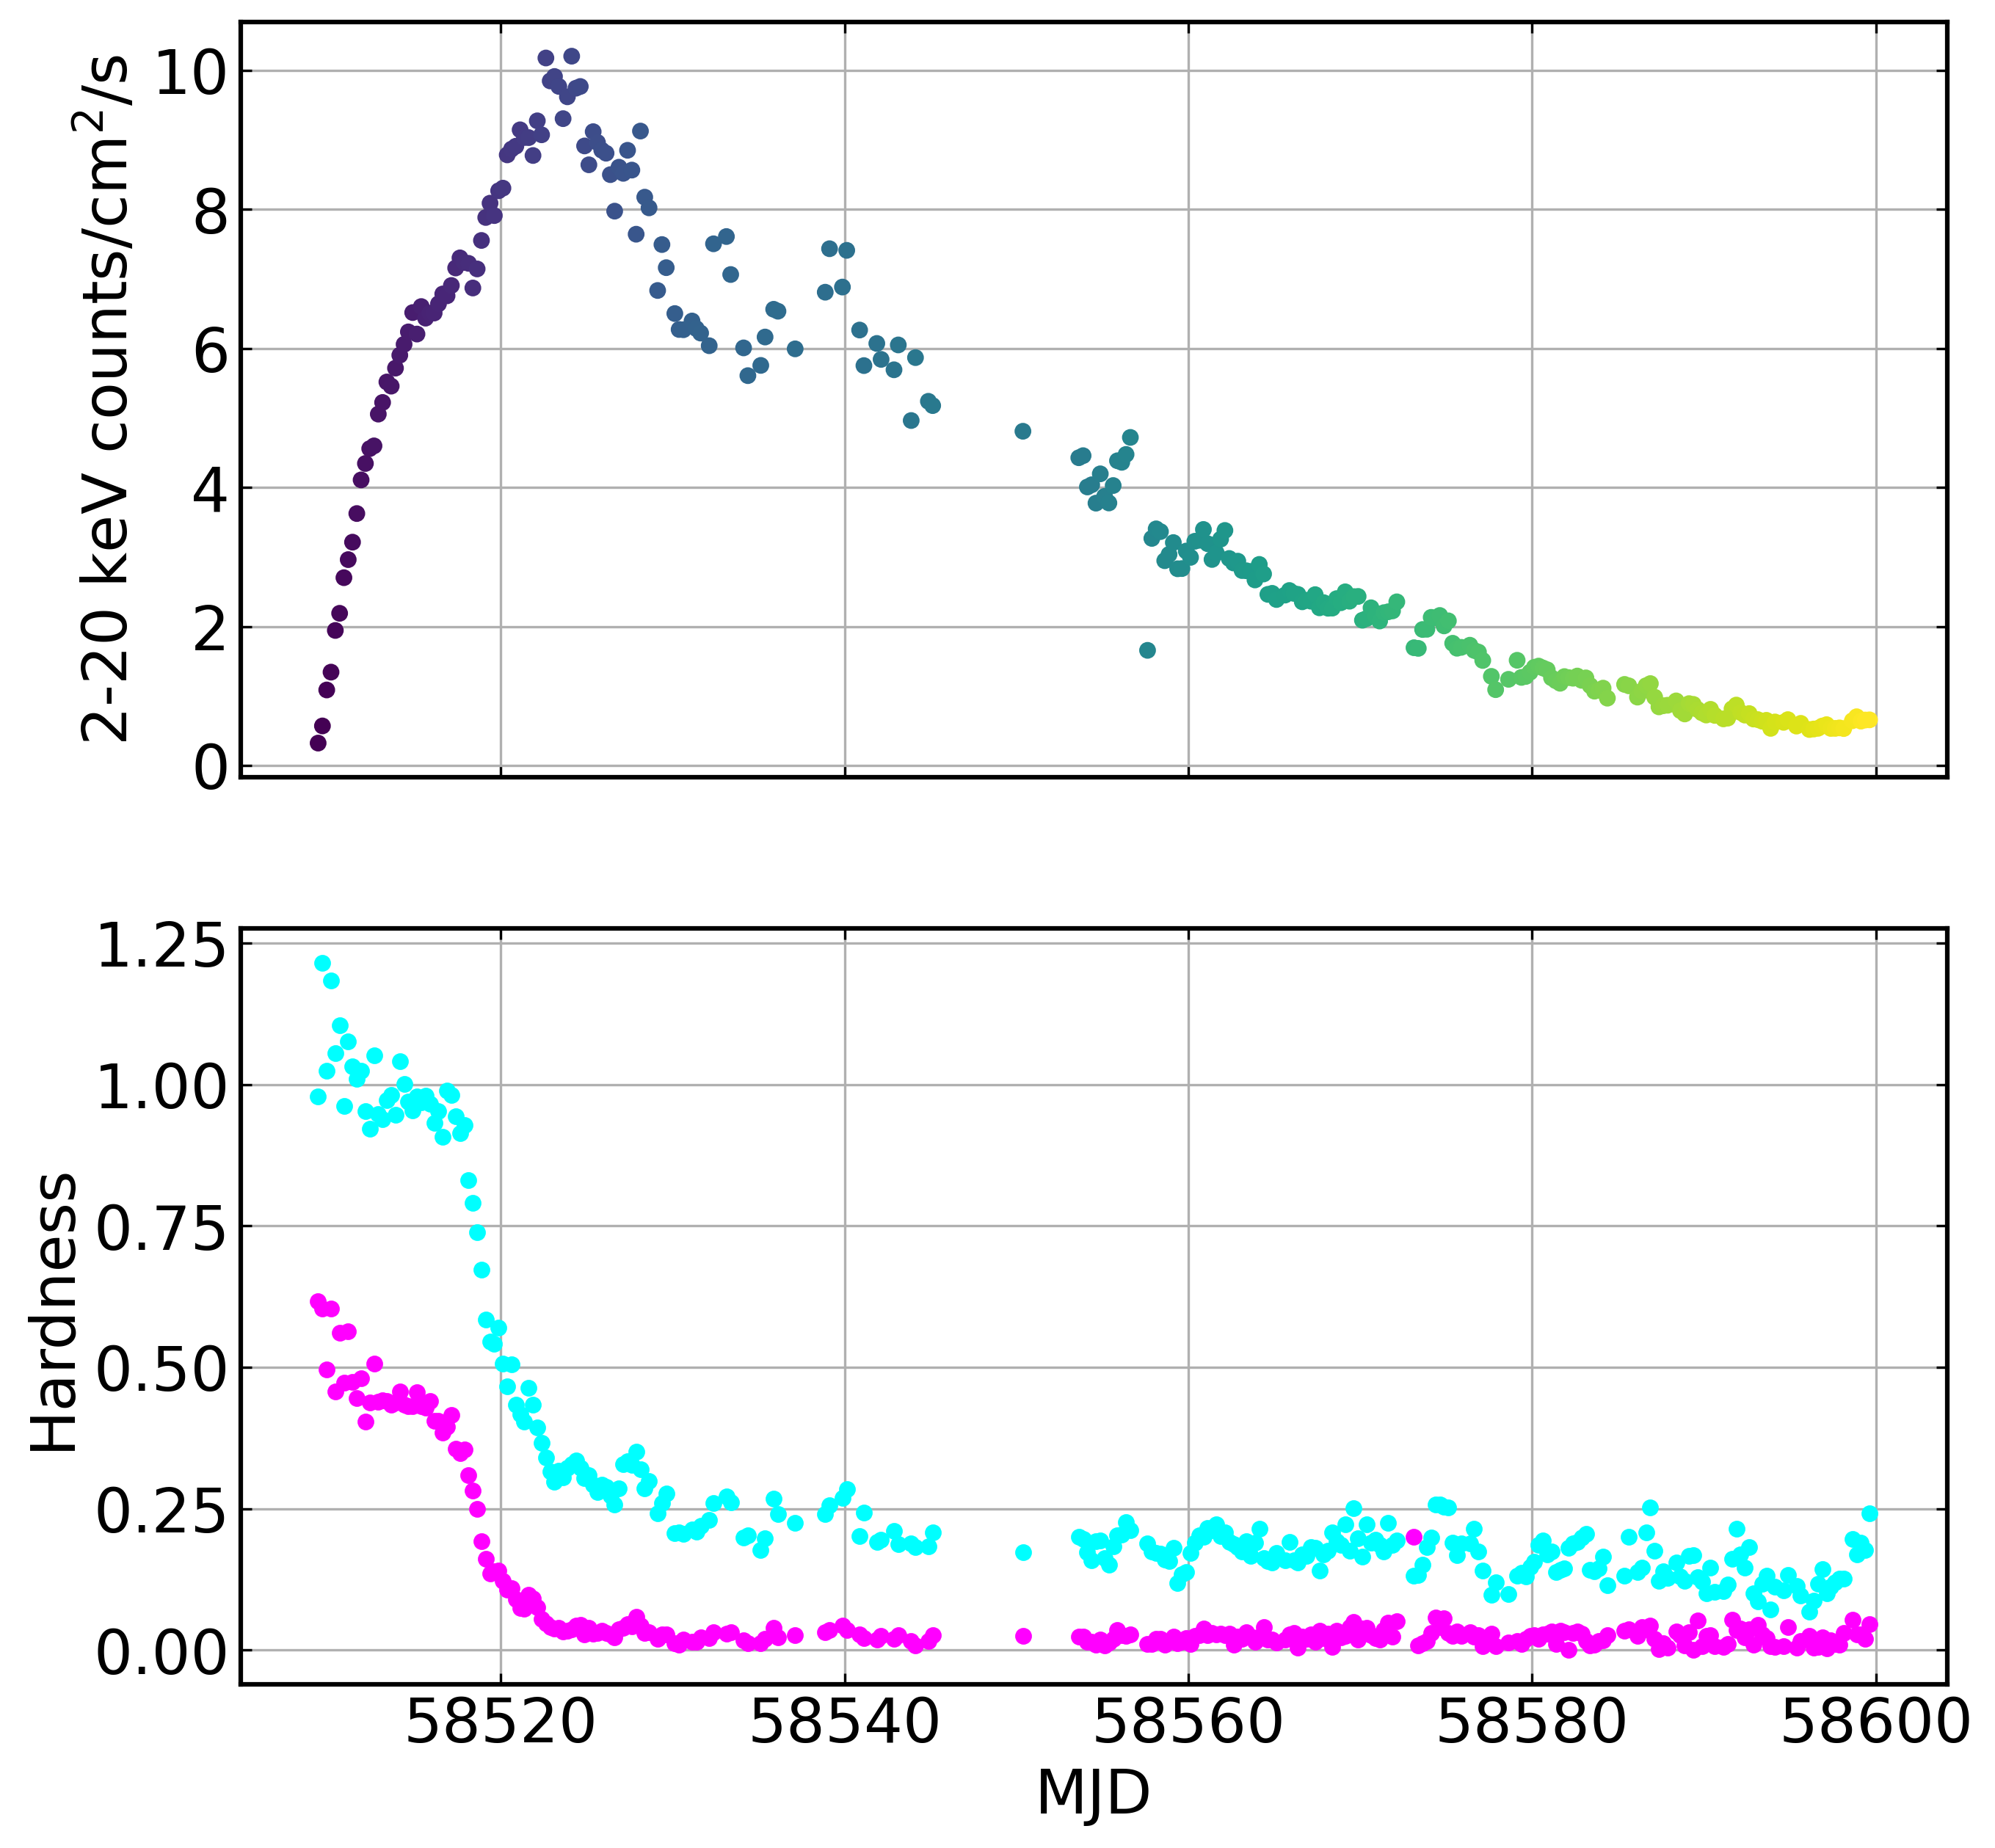

In [37]:
co_grad = np.arange(len(sr)) 

fig = plt.figure(figsize=(10, 10), dpi=300)

ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(tab['mjd'], tab['broad'], marker='.', s=80, c=co_grad)
ax1.set_ylabel(r"2-20 keV counts/cm$^{2}$/s", fontproperties=font_prop)


ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
ax2.scatter(tab['mjd'], hr, marker='.', s=80, c='magenta')
ax2.scatter(tab['mjd'], sr, marker='.', s=80, c='cyan')
ax2.set_ylabel("Hardness", fontproperties=font_prop)

ax2.set_xlabel("MJD", fontproperties=font_prop)

ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_ticks_position('both')
ax1.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=False, labeltop=False, direction="in")
ax1.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax2.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax2.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
    ax2.spines[axis].set_linewidth(1.5)
ax1.xaxis.grid(True, which='major')
ax1.yaxis.grid(True, which='major')
ax1.set_axisbelow(True)
ax2.xaxis.grid(True, which='major')
ax2.yaxis.grid(True, which='major')
ax2.set_axisbelow(True)
plt.savefig('%s_maxi_colors.png' % obj_name, dpi=300, tight_layout=True)
plt.show()


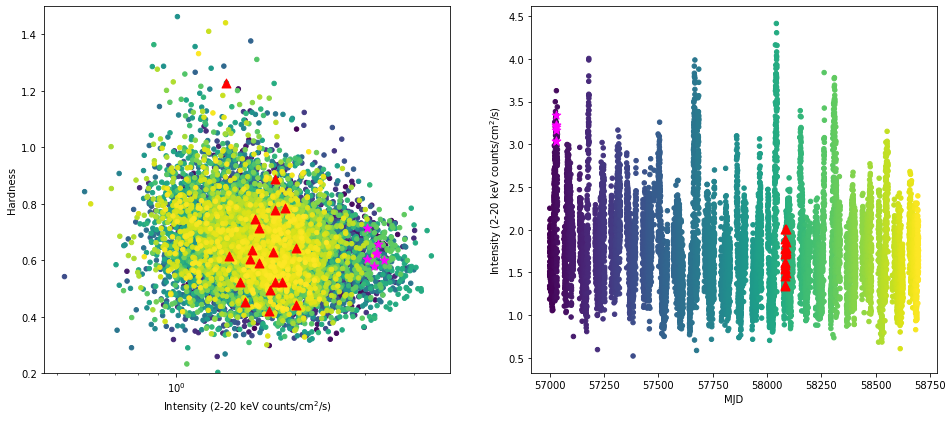

In [7]:
co_grad = np.arange(len(tab)) 
fig = plt.figure(figsize=(16, 6.75))
gs1 = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs1[0])
ax1.scatter(tab['broad'], hr2, marker='.', s=80, c=co_grad)
ax1.scatter(broad_nb, hr2_nb, marker='*', s=80, color='magenta')
ax1.scatter(broad_nicer, hr2_nicer, marker='^', s=80, c='red')
ax1.set_xlabel(r"Intensity (2-20 keV counts/cm$^{2}$/s)")
ax1.set_ylabel("Hardness")
ax1.set_xscale('log')
ax1.set_ylim(0.2, 1.5)
# ax1.set_ylim()
ax2 = plt.subplot(gs1[1])
ax2.scatter(tab['mjd'], tab['broad'], marker='.', s=80, c=co_grad)
ax2.scatter(mjd_nb, broad_nb, marker='*', s=80, c='magenta')
ax2.scatter(mjd_nicer, broad_nicer, marker='^', s=80, c='red')
ax2.set_xlabel("MJD")
ax2.set_ylabel(r"Intensity (2-20 keV counts/cm$^{2}$/s)")
plt.show()